In [1]:
import pandas as pd
import numpy as np
import pylab
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import linear_model as LM


df = pd.read_csv('churn_clean.csv')
df.loc[(df['Churn']== 'Yes'), 'Churn'] = 1
df.loc[(df['Churn']== 'No'), 'Churn'] = 0
df.Churn = df.Churn.astype('int')

In [2]:
df.shape

(10000, 50)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
df_copy = df.copy()

In [5]:
a = df_copy[['CaseOrder', 'Zip','Lat','Lng','Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts','Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year','item1','item2','item3','item4','item5','item6','item7','item8']].values
b = df_copy[['Churn']].values
c = sm.add_constant(a)
d = sm.OLS(b,c)
fitted = d.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     288.1
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:29:21   Log-Likelihood:                -3462.8
No. Observations:               10000   AIC:                             6974.
Df Residuals:                    9976   BIC:                             7147.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1140      0.055     -2.061      0.039      -0.222      -0.006
x1         -3.682e-06   2.14e-06     -1.719      0.086   -7.88e-06    5.18e-07
x2          2.398e-07   3.04e-07      0.789      0.430   -3.56e-07    8.35e-07
x3             0.0003      0.001      0.368      0.713      -0.001       0.002
x4             0.0002      0.001      0.386      0.699      -0.001       0.001
x5         -2.799e-07   2.45e-07     -1.144      0.253    -7.6e-07       2e-07
x6            -0.0099      0.002     -5.946      0.000      -0.013      -0.007
x7             0.0012      0.000      7.040      0.000       0.001       0.002
x8          9.331e-08   1.22e-07      0.767      0.443   -1.45e-07    3.32e-07
x9            -0.0009      0.001     -0.758      0.449      -0.003       0.001
x10            0.0008      0.001      0.699      0.485      -0.001       0.003
x11            0.0028      0.003      0.810      0.418      -0.004       0.010
x12           -0.0055      0.005     -1.013      0.311      -0.016       0.005
x13           -0.0326      0.001    -26.000      0.000      -0.035      -0.030
x14            0.0028   9.38e-05     30.123      0.000       0.003       0.003
x15            0.0003    1.5e-05     20.189      0.000       0.000       0.000
x16           -0.0020      0.005     -0.404      0.686      -0.012       0.008
x17           -0.0047      0.005     -1.013      0.311      -0.014       0.004
x18            0.0015      0.004      0.352      0.725      -0.007       0.010
x19           -0.0036      0.004     -0.966      0.334      -0.011       0.004
x20           -0.0022      0.004     -0.571      0.568      -0.010       0.005
x21            0.0005      0.004      0.127      0.899      -0.007       0.008
x22           -0.0005      0.004     -0.120      0.904      -0.008       0.007
x23           -0.0008      0.004     -0.229      0.819      -0.008       0.006
==============================================================================
Omnibus:                      651.328   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              345.101
Skew:                           0.294   Prob(JB):                     1.15e-75
Kurtosis:                       2.305   Cond. No.                     1.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     288.1
Date:                Sun, 03 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:29:28   Log-Likelihood:                -3462.8
No. Observations:               10000   AIC:                             6974.
Df Residuals:                    9976   BIC:                             7147.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1140      0.055     -2.061      0.039      -0.222      -0.006
x1         -3.682e-06   2.14e-06     -1.719      0.086   -7.88e-06    5.18e-07
x2          2.398e-07   3.04e-07      0.789      0.430   -3.56e-07    8.35e-07
x3             0.0003      0.001      0.368      0.713      -0.001       0.002
x4             0.0002      0.001      0.386      0.699      -0.001       0.001
x5         -2.799e-07   2.45e-07     -1.144      0.253    -7.6e-07       2e-07
x6            -0.0099      0.002     -5.946      0.000      -0.013      -0.007
x7             0.0012      0.000      7.040      0.000       0.001       0.002
x8          9.331e-08   1.22e-07      0.767      0.443   -1.45e-07    3.32e-07
x9            -0.0009      0.001     -0.758      0.449      -0.003       0.001
x10            0.0008      0.001      0.699      0.485      -0.001       0.003
x11            0.0028      0.003      0.810      0.418      -0.004       0.010
x12           -0.0055      0.005     -1.013      0.311      -0.016       0.005
x13           -0.0326      0.001    -26.000      0.000      -0.035      -0.030
x14            0.0028   9.38e-05     30.123      0.000       0.003       0.003
x15            0.0003    1.5e-05     20.189      0.000       0.000       0.000
x16           -0.0020      0.005     -0.404      0.686      -0.012       0.008
x17           -0.0047      0.005     -1.013      0.311      -0.014       0.004
x18            0.0015      0.004      0.352      0.725      -0.007       0.010
x19           -0.0036      0.004     -0.966      0.334      -0.011       0.004
x20           -0.0022      0.004     -0.571      0.568      -0.010       0.005
x21            0.0005      0.004      0.127      0.899      -0.007       0.008
x22           -0.0005      0.004     -0.120      0.904      -0.008       0.007
x23           -0.0008      0.004     -0.229      0.819      -0.008       0.006
==============================================================================
Omnibus:                      651.328   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              345.101
Skew:                           0.294   Prob(JB):                     1.15e-75
Kurtosis:                       2.305   Cond. No.                     1.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

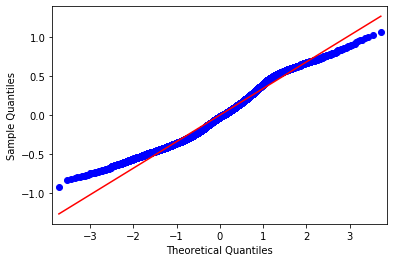

In [261]:
sm.qqplot(fitted.resid, line='s')
pylab.show()

In [262]:
regression = LM.LinearRegression(normalize=False, fit_intercept=True)

def r2_est(a,b):
    return r2_score(b,regression.fit(a,b).predict(a))

print ('Baseline R2: %0.3f' %  r2_est(a,b))

Baseline R2: 0.399


In [263]:
r2_impact = list()
for l in range(a.shape[1]):
    sel = [z for z in range(a.shape[1]) if z!=l]
    r2_impact.append(((r2_est(a,b) -r2_est(a[:,sel],b)) ,df_copy.columns[l]))
    
for imp, varname in sorted(r2_impact, reverse=True):
    print ('%6.3f %s' %  (imp, varname))

 0.055 Job
 0.041 TimeZone
 0.025 Children
 0.003 County
 0.002 State
 0.000 CaseOrder
 0.000 City
 0.000 Income
 0.000 Area
 0.000 Gender
 0.000 Population
 0.000 Customer_id
 0.000 Zip
 0.000 Lat
 0.000 Lng
 0.000 Churn
 0.000 Age
 0.000 UID
 0.000 Interaction
 0.000 Marital
 0.000 Contacts
 0.000 Outage_sec_perweek
 0.000 Email


,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Churn,Outage_sec_perweek,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
CaseOrder,1.000000,3.007020e-03,-0.014680,-0.001363,-0.007494,-0.006148,0.016038,0.000192,-0.409318,-0.001394,...,0.003677,0.825561,-0.004318,0.005959,0.003245,-5.640975e-03,0.016429,-0.007837,0.003595,-0.014840
Zip,0.003007,1.000000e+00,-0.042580,-0.901786,0.045138,-0.017205,-0.008135,0.002947,0.008199,-0.011581,...,-0.008717,-0.002527,-0.026024,-0.003215,-0.019687,6.196497e-07,0.002923,0.007375,-0.005537,-0.002577
Lat,-0.014680,-4.257985e-02,1.000000,-0.100639,-0.220598,-0.000452,-0.002943,0.006563,0.009387,0.004888,...,0.001406,-0.016949,0.005793,0.005380,-0.003421,1.101487e-02,-0.000464,-0.008726,0.006087,-0.019583
Lng,-0.001363,-9.017856e-01,-0.100639,1.000000,-0.048294,0.013634,0.012117,-0.002997,-0.004603,0.005683,...,0.011765,0.003446,0.024389,0.003024,0.014966,-2.397805e-03,0.001366,-0.008770,0.001601,0.001912
Population,-0.007494,4.513808e-02,-0.220598,-0.048294,1.000000,-0.005877,0.010538,-0.008639,-0.008533,0.005506,...,-0.004778,-0.003902,0.000618,-0.002571,0.001620,-8.272481e-03,0.006970,0.000834,-0.013062,0.008524
Children,-0.006148,-1.720505e-02,-0.000452,0.013634,-0.005877,1.000000,-0.029732,0.009942,-0.004264,0.001916,...,-0.009781,0.025585,0.011470,0.013146,0.003394,-1.676831e-02,-0.000240,-0.000547,0.000687,-0.005236
Age,0.016038,-8.135285e-03,-0.002943,0.012117,0.010538,-0.029732,1.000000,-0.004091,0.005630,-0.007995,...,0.010729,-0.014724,-0.005972,0.006659,-0.003778,1.223656e-02,-0.008305,0.010635,0.005353,0.015193
Income,0.000192,2.946523e-03,0.006563,-0.002997,-0.008639,0.009942,-0.004091,1.000000,0.005937,-0.009889,...,-0.003014,0.003674,-0.004009,0.007718,-0.002707,-2.274962e-02,0.011111,0.001768,0.016599,0.000740
Churn,-0.409318,8.198834e-03,0.009387,-0.004603,-0.008533,-0.004264,0.005630,0.005937,1.000000,-0.000168,...,0.372938,-0.441669,-0.007341,-0.013253,-0.011143,-3.396258e-03,-0.013971,0.001130,-0.008851,0.005653
Outage_sec_perweek,-0.001394,-1.158074e-02,0.004888,0.005683,0.005506,0.001916,-0.007995,-0.009889,-0.000168,1.000000,...,0.020447,0.004125,-0.023282,-0.007931,-0.021273,-6.060631e-03,-0.004122,-0.014926,-0.020899,0.008233


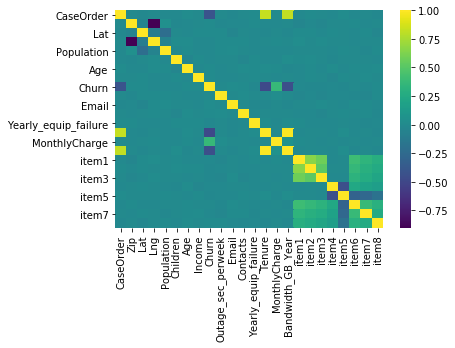

In [264]:
dfc = df_copy.corr()
display(dfc)
sns.heatmap(dfc, cmap = 'viridis')
plt.show();

In [265]:
df_corr = df_copy[df_copy.columns[0:49]].corr()['Churn'][:-1]
df_corr

CaseOrder              -0.409318
Zip                     0.008199
Lat                     0.009387
Lng                    -0.004603
Population             -0.008533
Children               -0.004264
Age                     0.005630
Income                  0.005937
Churn                   1.000000
Outage_sec_perweek     -0.000168
Email                   0.012326
Contacts                0.008567
Yearly_equip_failure   -0.015927
Tenure                 -0.485475
MonthlyCharge           0.372938
Bandwidth_GB_Year      -0.441669
item1                  -0.007341
item2                  -0.013253
item3                  -0.011143
item4                  -0.003396
item5                  -0.013971
item6                   0.001130
Name: Churn, dtype: float64

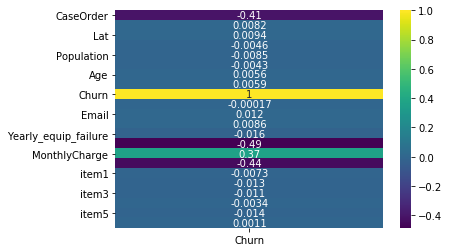

In [266]:
fig, ax = plt.subplots()
sns.heatmap(df_corr.to_frame(),annot=True, annot_kws={'size':10},cmap="viridis")
plt.show();

In [267]:
df_copy = df_copy[['CaseOrder','Churn','Tenure','MonthlyCharge','Bandwidth_GB_Year']]
df_corr = df_copy[df_copy.columns[0:6]].corr()['Churn'][:]
df_corr

CaseOrder           -0.409318
Churn                1.000000
Tenure              -0.485475
MonthlyCharge        0.372938
Bandwidth_GB_Year   -0.441669
Name: Churn, dtype: float64

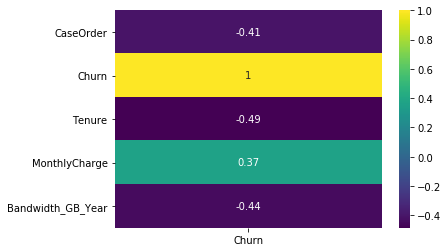

In [268]:
fig, ax = plt.subplots()
sns.heatmap(df_corr.to_frame(),annot=True, annot_kws={'size':10},cmap="viridis")
plt.show();

### Checking Eigen Values for Multicolliniearity in the Correlation Matrix.

In [269]:
correlation = np.corrcoef(df_copy, rowvar=0)
eigenvalues, eigenvectors = np.linalg.eig(correlation)
display(eigenvalues)

array([3.06349917, 1.24335033, 0.46725864, 0.21976707, 0.00612479])

### Next, Create a Regression Model with the Narrowed Columns

In [270]:
X = df_copy[['Tenure','MonthlyCharge','Bandwidth_GB_Year', 'CaseOrder']].values
y = df_copy[['Churn']].values
i = sm.add_constant(X)
l = sm.OLS(y,i)
fitted = l.fit()

In [271]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     1622.
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:59:51   Log-Likelihood:                -3508.3
No. Observations:               10000   AIC:                             7027.
Df Residuals:                    9995   BIC:                             7063.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1091      0.015     -7.073      0.000      -0.139      -0.079
x1            -0.0283      0.001    -24.408      0.000      -0.031      -0.026
x2             0.0030   9.18e-05     32.715      0.000       0.003       0.003
x3             0.0003   1.39e-05     18.115      0.000       0.000       0.000
x4         -3.556e-06   2.15e-06     -1.654      0.098   -7.77e-06    6.58e-07
==============================================================================
Omnibus:                      660.396   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              352.118
Skew:                           0.300   Prob(JB):                     3.46e-77
Kurtosis:                       2.304   Cond. No.                     3.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

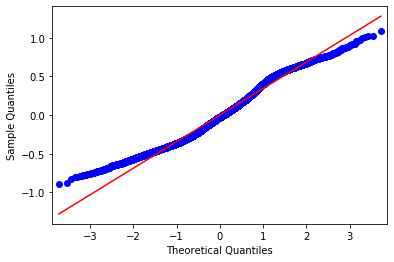

In [272]:
sm.qqplot(fitted.resid, line='s')
pylab.show()

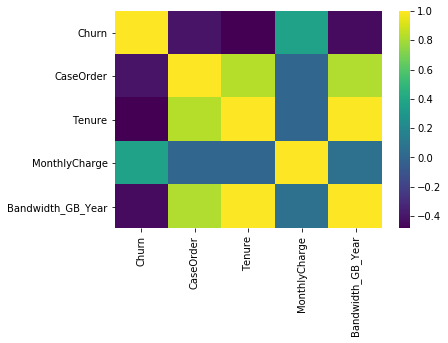

In [273]:
df2 = df.copy()
df2 = df2[['Churn','CaseOrder','Tenure','MonthlyCharge','Bandwidth_GB_Year']]
dft = df2.corr()
sns.heatmap(dft, cmap = 'viridis')
plt.show();


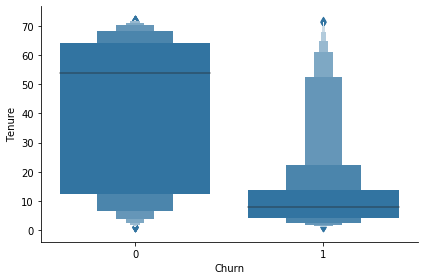

In [274]:
sns.catplot(x='Churn', y='Tenure', 
            data=df2,
            kind='boxen',
            height=4, aspect=1.5,
            color = sns.color_palette()[0])

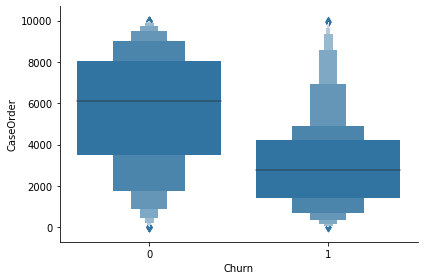

In [275]:
sns.catplot(x='Churn', y='CaseOrder', 
            data=df2,
            kind='boxen',
            height=4, aspect=1.5,
            color = sns.color_palette()[0])

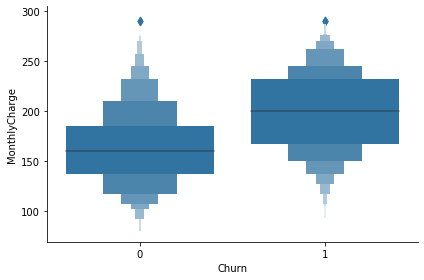

In [276]:
sns.catplot(x='Churn', y='MonthlyCharge', 
            data=df2,
            kind='boxen',
            height=4, aspect=1.5,
            color = sns.color_palette()[0])

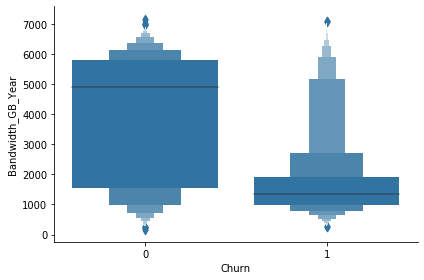

In [277]:
sns.catplot(x='Churn', y='Bandwidth_GB_Year', 
            data=df2,
            kind='boxen',
            height=4, aspect=1.5,
            color = sns.color_palette()[0])

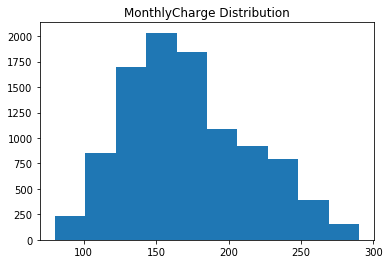

In [278]:
plt.hist(data = df2, x='MonthlyCharge')
plt.axis('tight')
plt.title('MonthlyCharge Distribution')
plt.show()

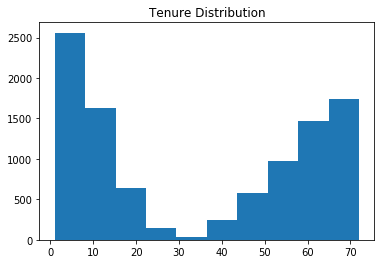

In [279]:
plt.hist(data = df2, x='Tenure')
plt.axis('tight')
plt.title('Tenure Distribution')
plt.show()

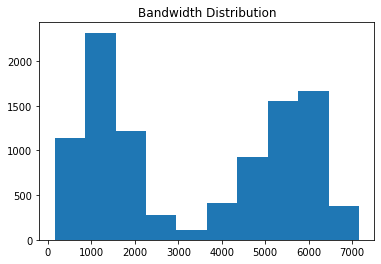

In [280]:
plt.hist(data = df2, x='Bandwidth_GB_Year')
plt.axis('tight')
plt.title('Bandwidth Distribution')
plt.show()

In [281]:
regression = LM.LinearRegression(normalize=False, fit_intercept=True)

def r2_est(X,y):
    return r2_score(y,regression.fit(X,y).predict(X))

print ('Baseline R2: %0.3f' %  r2_est(X,y))

Baseline R2: 0.394


In [282]:
r2_impact = list()
for l in range(X.shape[1]):
    sel = [z for z in range(X.shape[1]) if z!=l]
    r2_impact.append(((r2_est(X,y) -r2_est(X[:,sel],y)) ,df2.columns[l]))
    
for imp, varname in sorted(r2_impact, reverse=True):
    print ('%6.3f %s' %  (imp, varname))

 0.065 CaseOrder
 0.036 Churn
 0.020 Tenure
 0.000 MonthlyCharge
